## Day 34 Lecture 1 Assignment

In this assignment, we will learn about SVR. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

In [1]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
absent = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [3]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [14]:
absent['Absenteeism time in hours'].describe()

count    740.000000
mean       6.924324
std       13.330998
min        0.000000
25%        2.000000
50%        3.000000
75%        8.000000
max      120.000000
Name: Absenteeism time in hours, dtype: float64

We previously used this dataset for KNN regression. Recall that we removed all correlated columns as well as columns that are a function of two or more other columns (like BMI and weight and height) as well as columns that are not useful to us (like ID).
We also created dummy variables for the categorical columns in our dataset.
Finally, we split the data into test and train (with test being 20% of the data).

Perform these actions below.

In [4]:
absent2 = absent.drop(columns=['Weight','Age', 'Month of absence', 'ID'])
absent3 = pd.get_dummies(absent2, columns=['Education', 'Seasons', 'Pet', 'Son', 'Day of the week'], drop_first=True)

from sklearn.model_selection import train_test_split

y = absent3['Absenteeism time in hours']
X = absent3.drop(columns=['Absenteeism time in hours'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Scale the independent variables using the standard scaler

In [5]:
# answer below:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

Generate an SVR model to predict the number of hours of absenteeism. Compare the train and test scores.

In [6]:
# answer below:
from sklearn.svm import SVR

svr = SVR(kernel='linear')

svr.fit(X_train_scaled, y_train)

print("Training Score: ", svr.score(X_train_scaled, y_train))
print("Testing Score: ", svr.score(X_test_scaled, y_test))

Training Score:  0.04264039824286514
Testing Score:  0.05762244906626823


If you are unhappy with your model's performance, perform a grid search to optimize C. You may also want to compare something other than R squared, like MSE, and could try some other kernels than just linear.

In [7]:
# answer below:
from sklearn.model_selection import GridSearchCV

c = np.arange(1,100,10)
param_grid = {
    "C": c,
    "kernel": ['linear', 'poly', 'rbf'],
    "gamma": ['scale', 'auto']
}

svr_cv = GridSearchCV(svr, param_grid, scoring='neg_root_mean_squared_error', cv=5)

svr_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]),
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='neg_root_mean_squared_error')

In [8]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",svr_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",svr_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",svr_cv.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 SVR(C=71, gamma='auto')

 The best score across ALL searched params:
 -12.789575627998074

 The best parameters across ALL searched params:
 {'C': 71, 'gamma': 'auto', 'kernel': 'rbf'}


In [9]:
best_results = svr_cv.best_estimator_

In [10]:
print("Training Score: ", best_results.score(X_train_scaled, y_train))
print("Testing Score: ", best_results.score(X_test_scaled, y_test))

Training Score:  0.2989769093795611
Testing Score:  0.1514907950958564


In [11]:
from sklearn.metrics import mean_squared_error
print('Training Set RMSE: {:.4f}'.format(mean_squared_error(y_train, best_results.predict(X_train), squared=False)))
print('Testing Set RMSE: {:.4f}'.format(mean_squared_error(y_test, best_results.predict(X_test), squared=False)))

Training Set RMSE: 14.2685
Testing Set RMSE: 11.9834


Create a homoscedasticity (residual) plot. Look back at your KNN regression exercise (Day 32 Lecture 1). How do your model results compare?

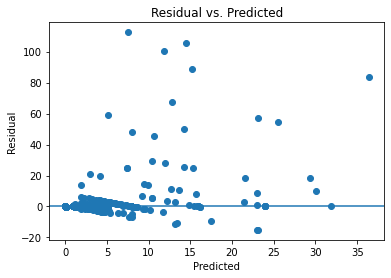

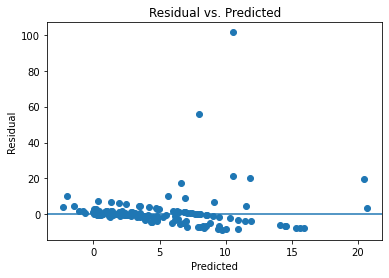

In [12]:
# answer below:
# With regard to RMSE, the SVR model is performing worse than the KNN model, 
# but better at predicting the testing data. There might still be too much noise in the features.

y_pred_train = best_results.predict(X_train_scaled)
train_predictions = y_pred_train
train_errors = y_train - y_pred_train

y_pred_test = best_results.predict(X_test_scaled)
test_predictions = y_pred_test
test_errors = y_test - y_pred_test

plt.scatter(train_predictions, train_errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

plt.scatter(test_predictions, test_errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

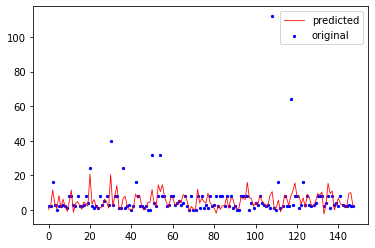

In [13]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred_test, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()